<a href="https://colab.research.google.com/github/Shivagharehzad95/imdb_reviews/blob/main/DSR_43_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]", "test[50%:]"], # Train, Validate, Test
    as_supervised=True,
    with_info=True
)
#info
dataset_train_original    = datasets[0] # 25K
dataset_validate_original = datasets[1] # 12.5K
dataset_test_original     = datasets[2] # 12.5K

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.WGIO7D_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.WGIO7D_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.WGIO7D_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for x, y in dataset_train_original.shuffle(1000).take(4):
    print(x.numpy().decode("utf-8"))
    print(y.numpy())
    print("")

This has to be one of the top overrated anime shows ever made. And yes, I was even shown the "End of Evangelion" and that still made me hate it even more. Not to mention the countless rip-offs of this show!<br /><br />I don't mind psychological and philosophy untertones, but Evangelion drags it out into the mud like nothing else! Not many of the characters seemed to be very interesting. The only ones that seemed to be interesting were Asuka, Misato and Pen-Pen. Other than that, mostly everyone else were a bunch of whiny crybaby losers. They need to go to a psyciatric center, not piloting giant robots against aliens called "Angels".<br /><br />Even the mecha and alien fights did not help at all. Goes something like this:<br /><br />"Well, there are these robots, and they are really cool because they bleed(!) when they get hurt, but they are not really mecha, but captured angels, so sometimes they go insane and don't do what the underaged pilots want, and they have to be controlled bette

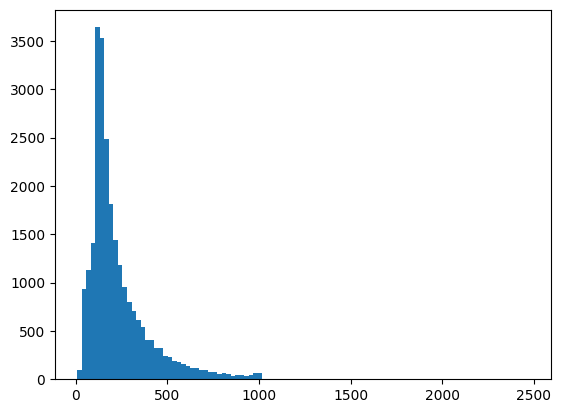

In [ ]:
lengths = []
for x, _ in dataset_train_original:
    length = len(x.numpy().decode("utf-8").split())
    lengths.append(length)

plt.hist(lengths, bins=100)
plt.show()
plt.close()

In [ ]:
longest_sample = ""
shortest_sample = " " * 100_000
for x, _ in dataset_train_original:
    x = x.numpy().decode("utf-8")
    if len(x) < len(shortest_sample):
        shortest_sample = x
    if len(x) > len(longest_sample):
        longest_sample = x

print(shortest_sample)
print(longest_sample)

This movie is terrible but it has some good effects.
Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle r

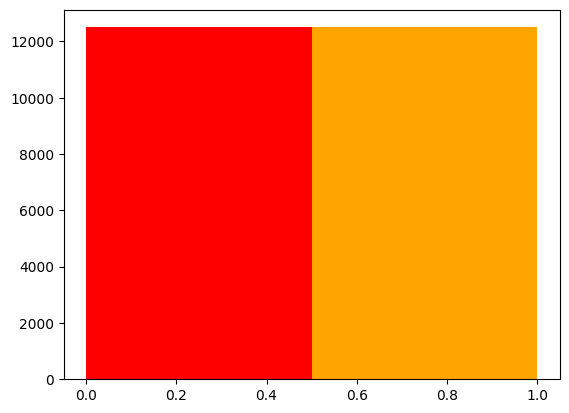

In [ ]:
labels = []
for _, y in dataset_train_original:
    labels.append(y.numpy())

_, _, patches = plt.hist(labels, bins=2)
patches[0].set_facecolor("red")
patches[1].set_facecolor("orange")
plt.show()
plt.close()

# Bag of Words Encoding (BOW)

In [ ]:
vocabulary_size = 10_000

# Proto tokenizer.
encoder = layers.TextVectorization(
    max_tokens=vocabulary_size, # Restricting our vocabulary.
    standardize="lower_and_strip_punctuation", # Lowers and strips punctuation.
    split="whitespace",
    output_mode="multi_hot" # A lot of zeroes, and a few ones.
)
encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(2048))

In [ ]:
vocabulary = encoder.get_vocabulary()
vocabulary[:10]

['[UNK]',
 np.str_('the'),
 np.str_('and'),
 np.str_('a'),
 np.str_('of'),
 np.str_('to'),
 np.str_('is'),
 np.str_('in'),
 np.str_('it'),
 np.str_('i')]

In [ ]:
encoded = encoder("One morning in June, some twenty year ago, I was born a rich man's son. I had everything that money could buy... but freedom... I... had... none.")

In [ ]:
print([int(x) for x in encoded])

[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(sum([int(x) for x in encoded]))

24


In [ ]:
dataset_train = dataset_train_original.cache().shuffle(25_000).batch(128)

dataset_validate = dataset_validate_original.cache().batch(128)

dataset_test = dataset_test_original.cache().batch(128)

In [ ]:
model = models.Sequential()
model.add(encoder)
#model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.build(input_shape=(None,))
model.summary()

model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_validate
)

#model.predict(tf.constant(["Hello my baby. Hello my honey."]))[0]

model.evaluate(dataset_test)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 10000)          │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        10,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,001 (39.07 KB)

 Trainable params: 10,001 (39.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7737 - loss: 0.5760 - val_accuracy: 0.8614 - val_loss: 0.4258
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8811 - loss: 0.3778 - val_accuracy: 0.8770 - val_loss: 0.3544
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8991 - loss: 0.3075 - val_accuracy: 0.8839 - val_loss: 0.3211
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9123 - loss: 0.2705 - val_accuracy: 0.8878 - val_loss: 0.3035
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9183 - loss: 0.2454 - val_accuracy: 0.8890 - val_loss: 0.2936
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9202 - loss: 0.2339 - val_accuracy: 0.8870 - val_loss: 0.2878
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9275 - loss: 0.2164 - val_accuracy: 0.8903 - val_loss: 0.2841
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9271 - loss: 0.2109 - val_ac

[0.27250391244888306, 0.8912000060081482]

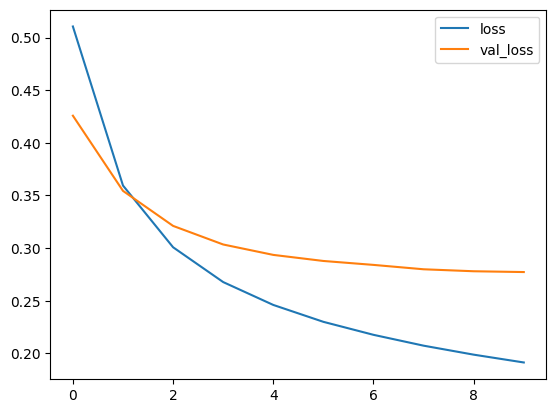

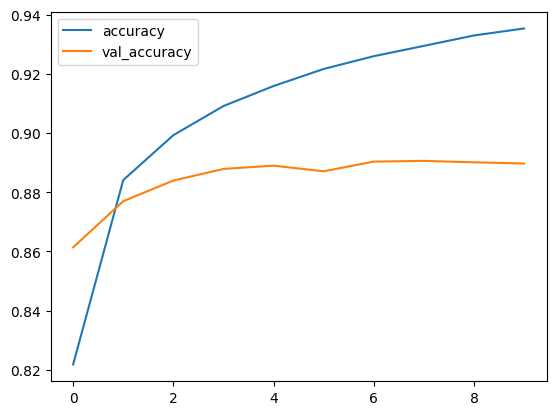

In [ ]:
def render_history(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

render_history(history)

In [ ]:
model.predict(tf.constant(["This is a really good movie. The lighting is really great. The dialogues are clearly audible."]))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([0.6385862], dtype=float32)

# Word Embeddings

In [ ]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size, # Not new!
    output_sequence_length=sequence_length, # New!
    standardize="lower_and_strip_punctuation", # Not new!
    split="whitespace", # Not new!
    output_mode="int" # New!
)
encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(2048))

In [ ]:
vocabulary = encoder.get_vocabulary()
vocabulary = [str(x) for x in vocabulary]
print(vocabulary[:100])
vocabulary[0] # Padding token [PAD]

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some', 'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she', 'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really', 'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we', 'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because', 'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most', 'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could', 'way', 'them', 'any']


''

In [ ]:
encoder("A beginning is a very delicate time. Know then that it is the year 10191. The known universe is ruled by the Padishah Emperor Shaddam IV. My father.")

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([   4,  445,    7,    4,   53, 5739,   62,  118,   92,   12,    9,
          7,    2,  336,    1,    2,  617, 2519,    7, 8025,   33,    2,
          1, 5341,    1, 5674,   56,  338,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])>

In [ ]:
vocabulary[2]

'the'

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_3            │ (None, 128)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_20 (Embedding)        │ (None, 128, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_12 (Reshape)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,097 (1.24 MB)

 Trainable params: 324,097 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5721 - loss: 0.6784 - val_accuracy: 0.7374 - val_loss: 0.5423


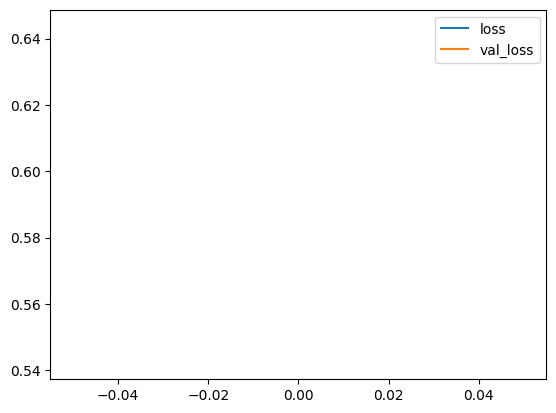

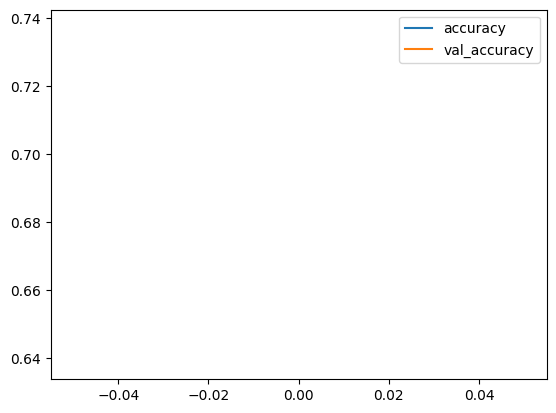

In [ ]:
model = models.Sequential() # Not new!
model.add(encoder) # Not new!
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32)) # BOY! Is this new!
model.add(layers.Reshape((sequence_length * 32,))) # This is new!
model.add(layers.Dense(1, activation="sigmoid")) # Just like before.
model.build(input_shape=(None,)) # Not new!
model.summary() # Not new!

model.compile(
    #optimizer=tf.keras.optimizers.Adam(), # ???
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=1,
    validation_data=dataset_validate
)

render_history(history)

In [ ]:
25_000 / 128

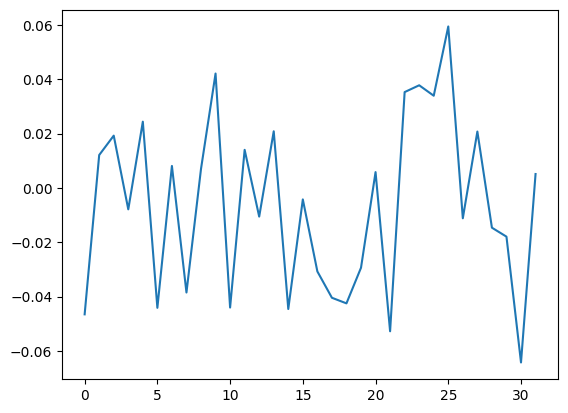

In [ ]:
word_embeddings = model.get_layer(index=1).get_weights()[0]
word_index = 666 # hero
word_embedding = word_embeddings[word_index]
plt.plot(word_embedding)